<a href="https://colab.research.google.com/github/X9alone/machinelearningPRO/blob/main/medgouseVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

# data = {
#     'Days': [1, 2, 3, 4, 5],
#     't': [25, 28, 23, 20, 28]
# }

# df = pd.DataFrame(data)

# print(df)

housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
               count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20

In [ ]:
print('propusti po kolonkach: \n', df.isnull().sum())

propusti po kolonkach: 
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


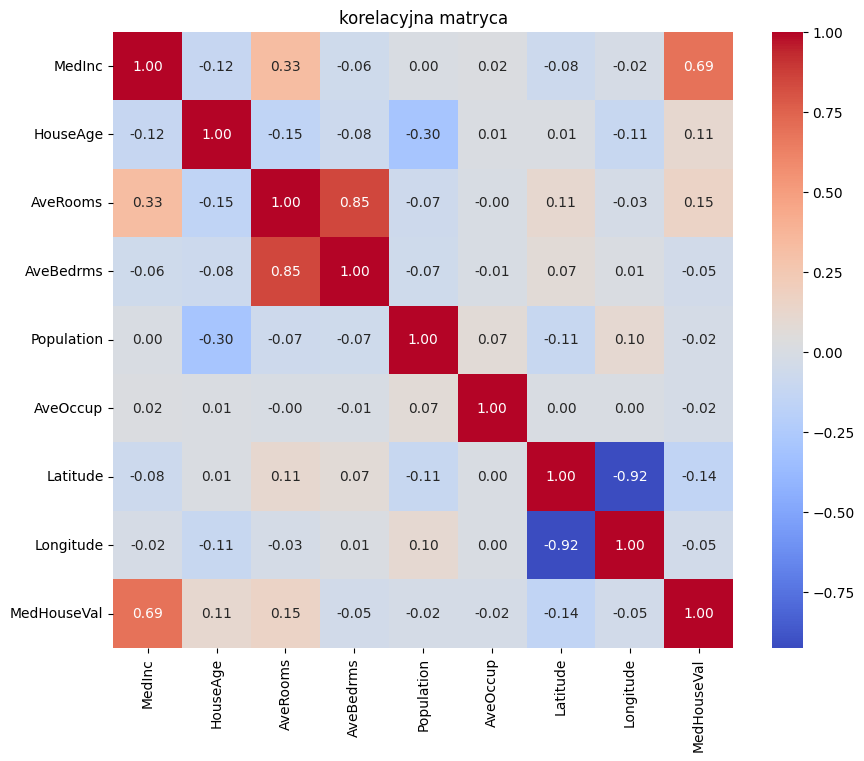

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('korelacyjna matryca')
plt.show()

In [ ]:
# X = df.drop(columns=['MedHouseVal'])
X = df[['MedInc']]
y = df['MedHouseVal']

In [ ]:
# print(X)
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16512, 1) (4128, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('koeficent determinacii', r2)

MSE: 0.7091157771765549
koeficent determinacii 0.45885918903846656


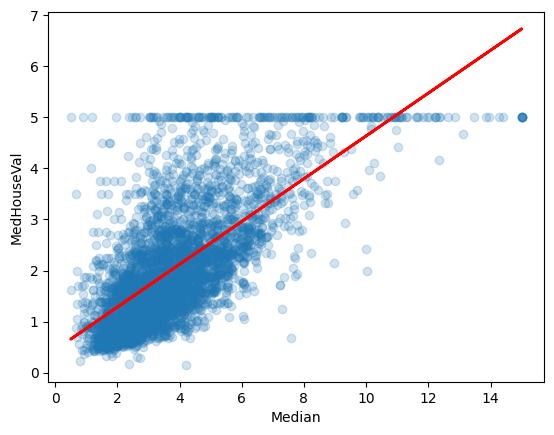

In [ ]:
plt.scatter(X_test, y_test, alpha=0.2, label='real')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='predict')
plt.xlabel('Median')
plt.ylabel("MedHouseVal")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
housing = fetch_california_housing()
# print(housing)
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# print(df)

df['MedHouseVal'] = housing.target
# print(housing_target )
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('sredniekwadratnaja pomylka(MSE)', mse)
print('koeficent determinacii', r2)

sredniekwadratnaja pomylka(MSE) 0.5558915986952444
koeficent determinacii 0.5757877060324508


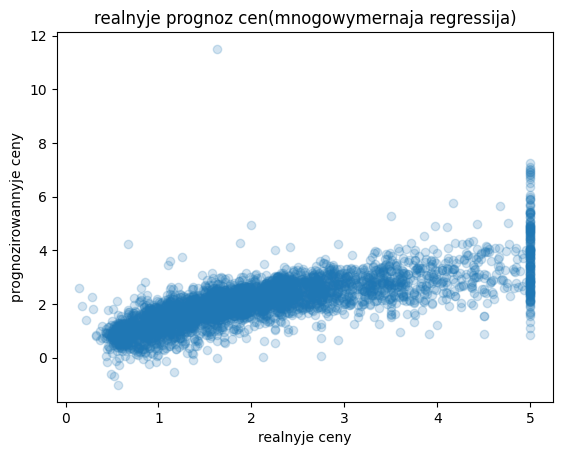

In [ ]:
plt.scatter(X_test, y_pred, alpha=0.2)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='predict')
plt.xlabel('realnyje ceny')
plt.ylabel("prognozirowannyje ceny")
plt.title('realnyje prognoz cen(mnogowymernaja regressija)')
plt.show()

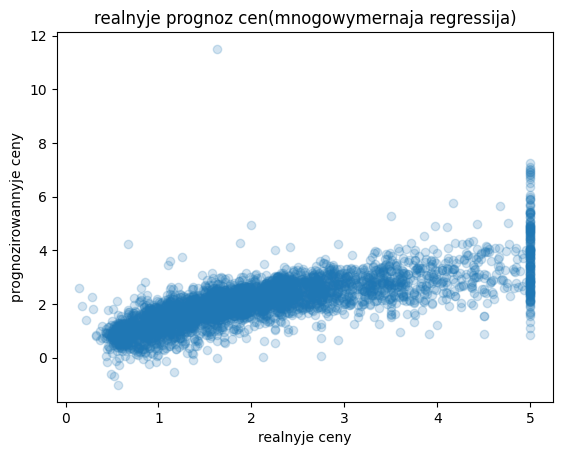

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('realnyje ceny')
plt.ylabel("prognozirowannyje ceny")
plt.title('realnyje prognoz cen(mnogowymernaja regressija)')
plt.show()

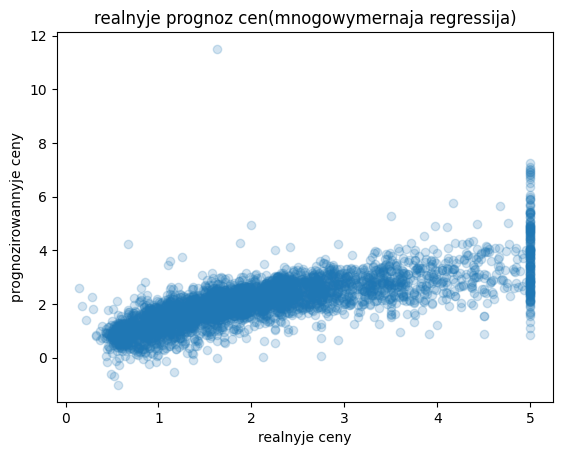

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.2)
# plt.plot(y_test, y_pred, color='red', linewidth=2, label='predict')
plt.xlabel('realnyje ceny')
plt.ylabel("prognozirowannyje ceny")
plt.title('realnyje prognoz cen(mnogowymernaja regressija)')
plt.show()

#Attention - обработка слов, какие важные, а какие нет


In [ ]:
import numpy as np

X = np.array([
    [1.0, 0.0, 0.5, 0.0], #token A
    [0.0, 1.0, 0.0, 0.5], #token B
    [1.0, 1.0, 0.0, 0.0], #token C
])

np.random.speed(1)
Wq = np.random.randn(4, 4) * 0.1
Wk = np.random.randn(4, 4) * 0.1
Wv = np.random.randn(4, 4) * 0.1

Q = X.dot(Wq)
K = X.dot(Wk)
V = X.dot(Wv)

d_k = Q.shape[-1]
score = Q.dot(K.T) / np.sqrt(d_k)

def softmax(x):
  e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
  return e_x / np.sum(e_x, axis=-1, keepdims=True)

weights = softmax(score)

attn_output = weights.dot(V)

In [ ]:
Self-attention - uwaga do sebe!

In [ ]:
import numpy as np

words = ['kit', 'sidit', 'kylymi']

X = np.array([
    [1.0, 0.0, 0.5],
    [0.9, 0.1, 0.3],
    [0.2, 0.9, 0.0]
])

Wq = np.random.randn(3, 3) * 0.1
Wk = np.random.randn(3, 3) * 0.1
Wv = np.random.randn(3, 3) * 0.1

Q = X @ Wq
K = X @ Wk
V = X @ Wv

scores = Q @ K.T / np.sqrt(K. shape[-1])
weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
attention_output = weights @ V

print("матpиця yвarи:\n", np.round(weights, 2))
print("результат після yвarи:\n", np.round(attention_output, 2))

матpиця yвarи:
 [[0.33 0.33 0.33]
 [0.33 0.33 0.33]
 [0.33 0.33 0.33]]
результат після yвarи:
 [[-0.03 -0.15  0.07]
 [-0.03 -0.15  0.07]
 [-0.03 -0.15  0.07]]


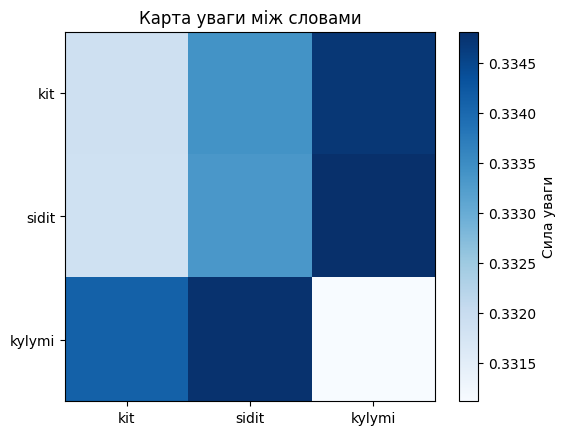

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(weights, cmap="Blues")
plt.xticks(ticks=range(3), labels=words)
plt.yticks(ticks=range(3), labels=words)
plt.colorbar(label = "Сила уваги")
plt.title("Карта уваги між словами")
plt.show()


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

texts = [
    'bla-bla-bla',
    'ble-ble-ble',
    'blu-blu-blu',
    'hop',
    'blu-blu-blu-blu-blu-blu-blu-blu-blu-blu-lu-lu',
    "Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи.",
    "Кисень необхідний для дихання живих організмів.",
    "Вода замерзає при температурі в 0 градусів Цельсія",
    "Теорема Піфагора використовується для прямокутних трикутників.",
    "Тараз Шевченко - відомий український поет і художник."
]

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [ ]:
embeddings = model.encode(texts, convert_to_tensor=True)
print('kilkist rechen: ', len(texts))
print('razmer vektorow: ', embeddings.shape)

kilkist rechen:  10
razmer vektorow:  torch.Size([10, 384])


In [ ]:
print(embeddings)

tensor([[ 0.0729,  0.3029,  0.0121,  ...,  0.1328,  0.1903, -0.0426],
        [-0.0167,  0.1349, -0.0369,  ..., -0.0510,  0.2978, -0.0300],
        [ 0.0632,  0.0999, -0.0478,  ...,  0.1092,  0.1766,  0.1387],
        ...,
        [-0.2313,  0.2721,  0.1937,  ..., -0.2226, -0.2895,  0.2334],
        [-0.1920, -0.3240, -0.0505,  ...,  0.5588,  0.1198,  0.1952],
        [ 0.1789, -0.0837, -0.2246,  ..., -0.3009, -0.1111, -0.3870]])


In [ ]:
query = input('wwedite swoj wopros: ')
query_embedding = model.encode(query, convert_to_tensor=True)

wwedite swoj wopros: ?


In [ ]:
consine_scores = util.cos_sim(query_embedding, embeddings)[0]
print(consine_scores)

tensor([0.6495, 0.3925, 0.4277, 0.5162, 0.4052, 0.0331, 0.1228, 0.0486, 0.0400,
        0.0841])


In [ ]:
best_match_idx = np.argmax(consine_scores)
print(f"luchyj otwetr na wopros '{query}':")
print(texts[best_match_idx])

luchyj otwetr na wopros '?':
bla-bla-bla
